In [1]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [2]:
data_filepath = "heart_failure_clinical_records_dataset.csv"
raw_data = pd.read_csv(data_filepath)

In [3]:
print('Number of positive samples:',sum(raw_data['DEATH_EVENT'] == 1))
print('Number of negative samples:',sum(raw_data['DEATH_EVENT'] == 0))

Number of positive samples: 96
Number of negative samples: 203


In [4]:
# We can choose to either remove or replace the NaN values and in this case there are so few that I can just remove them
raw_data.dropna(inplace = True)
# Divide the raw data into two dataframes based on the categorical heart failure variable
raw_data_neg, raw_data_pos = raw_data.groupby(['DEATH_EVENT'])
# We are taking an even sample of data from people who have had a heart failure and those who have not in order to reduce the bias of the model we will construct
df_filtered = pd.concat([raw_data_neg[1].sample(96),raw_data_pos[1].sample(96)]) 
# We want as much data as we can get while maintaining an similar number of positive and negative samples

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c3169ba50>,
      dtype=object)

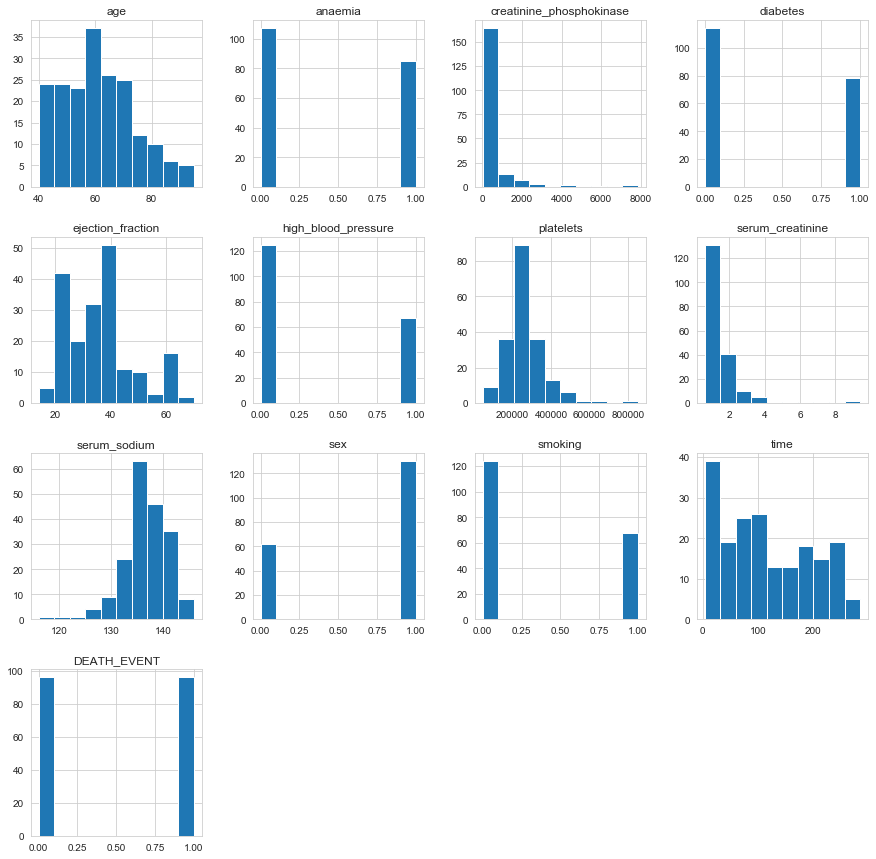

In [5]:
# We can visualize the new sample balanced around the categorical label we want to fit on
df_filtered.hist(figsize=(15,15)) 

In [6]:
# We can find better features by seeing what correlates well with the categorical label
df_filtered.corr() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.121450,-0.059304,-0.125869,0.044590,0.122517,-0.024512,0.178021,-0.092055,0.082297,0.013221,-0.313272,0.311876
anaemia,0.121450,1.000000,-0.205799,-0.075393,0.052468,0.051446,0.027394,0.078793,0.009576,-0.124505,-0.089983,-0.170720,0.073400
creatinine_phosphokinase,-0.059304,-0.205799,1.000000,0.042729,-0.029209,-0.061441,0.006807,-0.002028,0.092066,0.074602,-0.009360,-0.040445,0.082156
diabetes,-0.125869,-0.075393,0.042729,1.000000,0.001457,0.039631,0.113353,-0.055949,-0.037328,-0.222543,-0.146900,-0.036840,0.021209
ejection_fraction,0.044590,0.052468,-0.029209,0.001457,1.000000,0.014269,0.073587,0.048709,0.183936,-0.168649,-0.031306,0.050060,-0.261700
high_blood_pressure,0.122517,0.051446,-0.061441,0.039631,0.014269,1.000000,-0.008703,0.056857,-0.083045,-0.055258,0.006188,-0.196427,0.120199
platelets,-0.024512,0.027394,0.006807,0.113353,0.073587,-0.008703,1.000000,-0.030847,0.118553,-0.034774,0.101604,-0.022993,-0.081582
serum_creatinine,0.178021,0.078793,-0.002028,-0.055949,0.048709,0.056857,-0.030847,1.000000,-0.114443,-0.030310,-0.055759,-0.178472,0.287299
serum_sodium,-0.092055,0.009576,0.092066,-0.037328,0.183936,-0.083045,0.118553,-0.114443,1.000000,-0.010159,0.023131,0.118318,-0.175391
sex,0.082297,-0.124505,0.074602,-0.222543,-0.168649,-0.055258,-0.034774,-0.030310,-0.010159,1.000000,0.441538,0.001657,-0.066832


In [7]:
FEATURES = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
LABELS = ['DEATH_EVENT']

# Spliting our data into the train/test split:
X = df_filtered[FEATURES].values
y = df_filtered[LABELS].values.reshape(1,-1)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,shuffle=True)

Testing Train/Test on a Model

In [8]:
# Logistic Regression test
clr = LogisticRegression(random_state = 0)
clr.fit(X_train, y_train)

# Predicting the Test set results
y_pred_clr = clr.predict(X_test)

Accuracy = 68.97 %


Text(0.5, 1, 'Confusion Matrix')

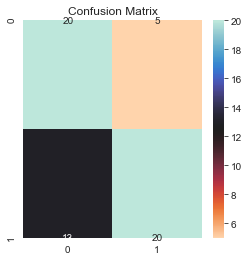

In [9]:
clr_cm = confusion_matrix(y_test, y_pred_clr)
acc_clr = accuracy_score(y_test, y_pred_clr)

print("Accuracy =","%.2f" % (acc_clr*100),"%")

plt.subplots(figsize=(4,4))
sns.heatmap(clr_cm, annot=True,cmap="icefire_r")
plt.title('Confusion Matrix')

Although the accuracy score is really bad we can see that the modeling will work and we can move forward with more modeling in the next section.

In [10]:
n_estimates = [150, 200, 250]
max_feats = [2, 3, 4]
max_depth = [1, 2, 3]
randfor = RandomForestClassifier(random_state=42)
clf_grid = GridSearchCV(randfor, {'n_estimators': n_estimates, 'max_features': max_feats, 'max_depth': max_depth}
                        , cv=5, scoring='accuracy')
clf_grid.fit(X_train, y_train)

# Predict on the test (and training) set to calculate metrics:
y_predict_train = clf_grid.predict(X_train)
y_predict_test = clf_grid.predict(X_test)

print('Best parameters for n_estimators, max_features, and max_depth: \n')
print(clf_grid.best_params_, clf_grid.best_score_)
print('\nAccuracy Score:')
print(accuracy_score(y_predict_test, y_test))
print('\nConfusion Matrix')
print(confusion_matrix(y_predict_test, y_test))

print("\n[Training Classification Report:]")
print(classification_report(y_train, y_predict_train))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test))

Best parameters for n_estimators, max_features, and max_depth: 

{'max_depth': 3, 'max_features': 3, 'n_estimators': 150} 0.7752136752136752

Accuracy Score:
0.7758620689655172

Confusion Matrix
[[20  8]
 [ 5 25]]

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        71
           1       0.89      0.87      0.88        63

    accuracy                           0.89       134
   macro avg       0.89      0.89      0.89       134
weighted avg       0.89      0.89      0.89       134

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        25
           1       0.83      0.76      0.79        33

    accuracy                           0.78        58
   macro avg       0.77      0.78      0.77        58
weighted avg       0.78      0.78      0.78        58



My Mentor suggested I include SMOTE to generate synthetic samples by taking real samples and perturbating the values in the direction of the other samples of the minority class for a more balanced sample for classification.

In [20]:
from imblearn.over_sampling import SMOTE
import sklearn.utils

sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, y_train)

In [22]:
#Decision Tree with balanced Data

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
    
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, 
                                  min_samples_split=10, random_state=99)
tree.fit(X_train_res,Y_train_res)
pred_tree = tree.predict(X_test)

tree_smote = classification_report(y_test, pred_tree, output_dict=True,target_names= ["NO", "YES"] )

print(classification_report(y_test, pred_tree, target_names= ["NO", "YES"]))

              precision    recall  f1-score   support

          NO       0.61      0.76      0.68        25
         YES       0.78      0.64      0.70        33

    accuracy                           0.69        58
   macro avg       0.70      0.70      0.69        58
weighted avg       0.71      0.69      0.69        58



In [23]:
#Random Forest with balanced Data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report


forest_clas = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=500, 
                                         min_samples_leaf=20)
forest_clas.fit(X_train_res,Y_train_res)
    
pred_for = forest_clas.predict(X_test)

rand_smote = classification_report(y_test, pred_for, output_dict=True,target_names= ["NO", "YES"] )

print(classification_report(y_test, pred_for, target_names= ["NO", "YES"]))

              precision    recall  f1-score   support

          NO       0.66      0.76      0.70        25
         YES       0.79      0.70      0.74        33

    accuracy                           0.72        58
   macro avg       0.72      0.73      0.72        58
weighted avg       0.73      0.72      0.73        58



In [25]:
#Logistic Regression with balanced Data
from sklearn import linear_model
logit_model = linear_model.LogisticRegression()
logit_model.fit(X_train_res, Y_train_res)
    
pred_log = logit_model.predict(X_test)

log_smote = classification_report(y_test, pred_log, output_dict=True, target_names = ["NO", "YES"] )


print(classification_report(y_test, pred_log, target_names = ["NO", "YES"]))

              precision    recall  f1-score   support

          NO       0.61      0.76      0.68        25
         YES       0.78      0.64      0.70        33

    accuracy                           0.69        58
   macro avg       0.70      0.70      0.69        58
weighted avg       0.71      0.69      0.69        58



In [26]:
recall_smote = [tree_smote["YES"]["recall"] , rand_smote["YES"]["recall"] , log_smote["YES"]["recall"]]
recall = [0.71, 0.70, 0.66] #Recall values for modeling without smote
label = ["Tree Model", "Random Forest", "Logaritm"]

accuracy_smote = [tree_smote["accuracy"] , rand_smote["accuracy"] , log_smote["accuracy"]]
accuracy = [0.86, 0.87, 0.82]

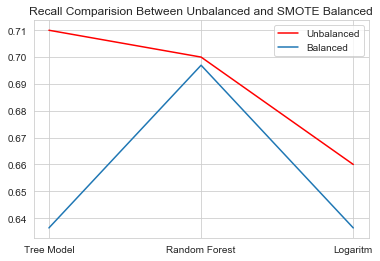

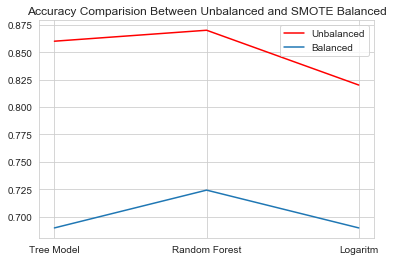

In [27]:
plt.plot(label, recall, c="r", label="Unbalanced")
plt.plot(label, recall_smote,label="Balanced")
plt.legend(loc="upper right")
plt.title("Recall Comparision Between Unbalanced and SMOTE Balanced")
plt.show()

plt.plot(label, accuracy, c="r", label="Unbalanced")
plt.plot(label, accuracy_smote, label="Balanced")
plt.legend(loc="upper right")
plt.title("Accuracy Comparision Between Unbalanced and SMOTE Balanced")
plt.show()